# DI 6.5 - Machine Learning Clustering

## This script contains the following
#### 1. Importing Libraries and Data and renaming columns
#### 2. The Elbow technique
#### 3. K-means clustering

### 1. Importing Libraries and Data and renaming columns

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [62]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [63]:
GADS_vars = pd.read_pickle(r'D:\Career Foundry\2) Data Immersion\6) Advanced Analytics & Dashboard Design\DI 6 - Jupyter Folder\EMPRES Global Animal Disease Surveillance Analysis\02 Data\Prepared Data\GADS_vars6.2.pkl')

In [64]:
path = r'D:\Career Foundry\2) Data Immersion\6) Advanced Analytics & Dashboard Design\DI 6 - Jupyter Folder\EMPRES Global Animal Disease Surveillance Analysis'

In [65]:
path

'D:\\Career Foundry\\2) Data Immersion\\6) Advanced Analytics & Dashboard Design\\DI 6 - Jupyter Folder\\EMPRES Global Animal Disease Surveillance Analysis'

In [66]:
GADS_vars.shape

(17008, 11)

In [67]:
# Allowing for full few of all columns

pd.set_option('display.max_columns', 11)
GADS_vars.head()

,ID,Latitude,Longitude,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered,Humans Age,Humans Affected,Humans Deaths
0,230399,-27.900000,30.800000,248000.0,12.0,12.0,50000.0,0.0,0.0,NaN,NaN
1,230381,54.837037,73.354155,122.0,6.0,1.0,0.0,0.0,NaN,NaN,NaN
2,230333,-21.077740,30.211620,1283.0,112.0,0.0,0.0,7.0,NaN,NaN,NaN
3,230396,-26.000000,28.300000,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
4,230371,49.237900,17.700200,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN


In [68]:
GADS_vars.describe()

,ID,Latitude,Longitude,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered,Humans Age,Humans Affected,Humans Deaths
count,17008.000000,17008.000000,17008.000000,1.700800e+04,17008.000000,17008.000000,17008.000000,17008.000000,1068.000000,1417.000000,451.000000
mean,218823.465075,39.168443,37.774981,4.302931e+03,280.464487,165.929327,2879.526282,72.088841,17.701311,1.017643,0.889135
std,7048.338831,16.817821,41.034310,3.373946e+04,5383.268052,3751.408793,24846.023432,3682.319155,26.932867,0.620142,0.321306
min,206270.000000,-36.856210,-146.490000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,212070.750000,32.090000,11.950000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,219591.500000,43.821579,24.511700,3.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,224717.250000,48.102805,43.424390,1.300000e+02,3.000000,1.000000,1.000000,0.000000,41.000000,1.000000,1.000000
max,230399.000000,68.392000,144.847374,2.000000e+06,460000.000000,439799.000000,913590.000000,339006.000000,94.000000,24.000000,2.000000


In [69]:
GADS_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008 entries, 0 to 17007
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  17008 non-null  int64  
 1   Latitude            17008 non-null  float64
 2   Longitude           17008 non-null  float64
 3   Sum Sp.AtRisk       17008 non-null  float64
 4   Sum Sp.Cases        17008 non-null  float64
 5   Sum Sp.Deaths       17008 non-null  float64
 6   Sum Sp.Destroyed    17008 non-null  float64
 7   Sum Sp.Slaughtered  17008 non-null  float64
 8   Humans Age          1068 non-null   float64
 9   Humans Affected     1417 non-null   float64
 10  Humans Deaths       451 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 1.4 MB


In [70]:
# Dropping ID column

GADS_nvars = GADS_vars.drop(columns = ['ID'])

In [71]:
GADS_nvars

,Latitude,Longitude,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered,Humans Age,Humans Affected,Humans Deaths
0,-27.900000,30.800000,248000.0,12.0,12.0,50000.0,0.0,0.0,NaN,NaN
1,54.837037,73.354155,122.0,6.0,1.0,0.0,0.0,NaN,NaN,NaN
2,-21.077740,30.211620,1283.0,112.0,0.0,0.0,7.0,NaN,NaN,NaN
3,-26.000000,28.300000,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
4,49.237900,17.700200,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
17003,7.289176,8.857676,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
17004,15.112823,-23.645005,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
17005,6.658696,2.489576,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
17006,7.143645,3.278189,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


#### Missing Values

In [73]:
GADS_nvars.isnull().sum()

Latitude                  0
Longitude                 0
Sum Sp.AtRisk             0
Sum Sp.Cases              0
Sum Sp.Deaths             0
Sum Sp.Destroyed          0
Sum Sp.Slaughtered        0
Humans Age            15940
Humans Affected       15591
Humans Deaths         16557
dtype: int64

In [74]:
GADS_nvars[['Humans Age', 'Humans Affected', 'Humans Deaths']].fillna(0)

,Humans Age,Humans Affected,Humans Deaths
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
17003,0.0,0.0,0.0
17004,0.0,0.0,0.0
17005,0.0,0.0,0.0
17006,0.0,0.0,0.0


In [75]:
GADS_nvars.isnull().sum()

Latitude                  0
Longitude                 0
Sum Sp.AtRisk             0
Sum Sp.Cases              0
Sum Sp.Deaths             0
Sum Sp.Destroyed          0
Sum Sp.Slaughtered        0
Humans Age            15940
Humans Affected       15591
Humans Deaths         16557
dtype: int64

In [76]:
# Fillna code isn't filling blank values with zero, another more advance code will be used. Obtained from Gemini AI.

for col in ['Humans Age', 'Humans Affected', 'Humans Deaths']:
    GADS_nvars[col] = GADS_nvars[col].fillna(0).astype(float)

In [77]:
print(GADS_nvars[['Humans Age', 'Humans Affected', 'Humans Deaths']].isnull().sum())

Humans Age         0
Humans Affected    0
Humans Deaths      0
dtype: int64


In [78]:
GADS_nvars.isnull().sum()

Latitude              0
Longitude             0
Sum Sp.AtRisk         0
Sum Sp.Cases          0
Sum Sp.Deaths         0
Sum Sp.Destroyed      0
Sum Sp.Slaughtered    0
Humans Age            0
Humans Affected       0
Humans Deaths         0
dtype: int64

In [79]:
# No more blank values, all filled with '0'

#### Duplicates

In [81]:
dup = GADS_nvars[GADS_nvars.duplicated()]

In [82]:
dup

,Latitude,Longitude,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered,Humans Age,Humans Affected,Humans Deaths
133,48.690055,23.186025,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
139,49.234600,17.702200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
144,48.340439,23.882090,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
175,49.238700,17.693600,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
179,49.238700,17.692700,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16945,31.262838,120.621602,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16946,31.275757,120.630027,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16953,29.652445,91.122952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16959,22.112802,106.757995,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
GADS_nvars.shape

(17008, 10)

In [84]:
GADS_ndvars = GADS_nvars.drop_duplicates()

In [85]:
GADS_ndvars.shape

(15345, 10)

In [86]:
GADS_ndvars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15345 entries, 0 to 17007
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitude            15345 non-null  float64
 1   Longitude           15345 non-null  float64
 2   Sum Sp.AtRisk       15345 non-null  float64
 3   Sum Sp.Cases        15345 non-null  float64
 4   Sum Sp.Deaths       15345 non-null  float64
 5   Sum Sp.Destroyed    15345 non-null  float64
 6   Sum Sp.Slaughtered  15345 non-null  float64
 7   Humans Age          15345 non-null  float64
 8   Humans Affected     15345 non-null  float64
 9   Humans Deaths       15345 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


### 2. The Elbow technique

In [88]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [89]:
score = [kmeans[i].fit(GADS_ndvars).score(GADS_ndvars) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\jmesi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jmesi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\jmesi\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jmesi\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\jmesi\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

[-30643169812837.5,
 -14313890738527.883,
 -8719074559170.033,
 -6856764865081.896,
 -5628635013017.421,
 -3669485077165.4116,
 -3000923051739.8535,
 -2530697701235.099,
 -2274822082959.93]

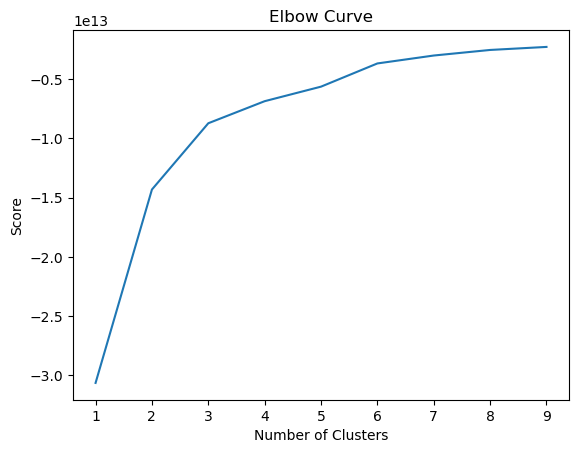

In [90]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### In this example there are several jumps. A small jump from two to three with a larger degree of change and a much larger jump from three to seven with a smaller degree of change. The optimal count for my cluster is going to be 4

### 3. K-means clustering

In [93]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [94]:
# Fit the k-means object to the data.

kmeans.fit(GADS_ndvars)

KMeans(n_clusters=4)

In [95]:
GADS_ndvars['clusters'] = kmeans.fit_predict(GADS_ndvars)

C:\Users\jmesi\AppData\Local\Temp\ipykernel_22776\379287701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GADS_ndvars['clusters'] = kmeans.fit_predict(GADS_ndvars)


In [96]:
GADS_ndvars.head(30)

,Latitude,Longitude,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,Sum Sp.Destroyed,Sum Sp.Slaughtered,Humans Age,Humans Affected,Humans Deaths,clusters
0,-27.900000,30.800000,248000.0,12.0,12.0,50000.0,0.0,0.0,0.0,0.0,3
1,54.837037,73.354155,122.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,-21.077740,30.211620,1283.0,112.0,0.0,0.0,7.0,0.0,0.0,0.0,0
3,-26.000000,28.300000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,49.237900,17.700200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
5,49.237300,17.700800,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
6,-26.000000,28.300000,34.0,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0
7,47.771608,33.993286,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0
8,56.538381,16.119304,4000.0,1600.0,0.0,4000.0,0.0,0.0,0.0,0.0,0
9,-24.600000,27.200000,62.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0


In [97]:
GADS_ndvars['clusters'].value_counts()

clusters
0    15125
3      175
2       23
1       22
Name: count, dtype: int64

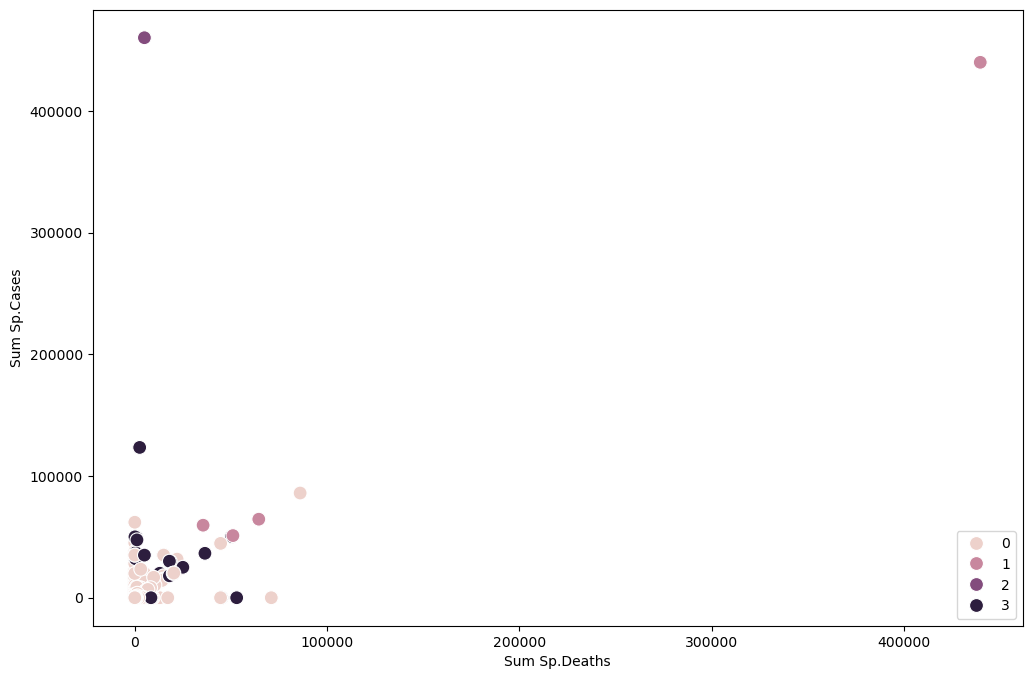

In [98]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=GADS_ndvars['Sum Sp.Deaths'], y=GADS_ndvars['Sum Sp.Cases'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sum Sp.Deaths') # Label x-axis.
plt.ylabel('Sum Sp.Cases') # Label y-axis.
plt.show()

In [99]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=GADS_ndvars['Sum Sp.Deaths'], y=GADS_ndvars['Sum Sp.Cases'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sum Sp.Deaths') # Label x-axis.
plt.ylabel('Sum Sp.Cases') # Label y-axis.
plt.savefig("cluster deaths vs cases -4.png")

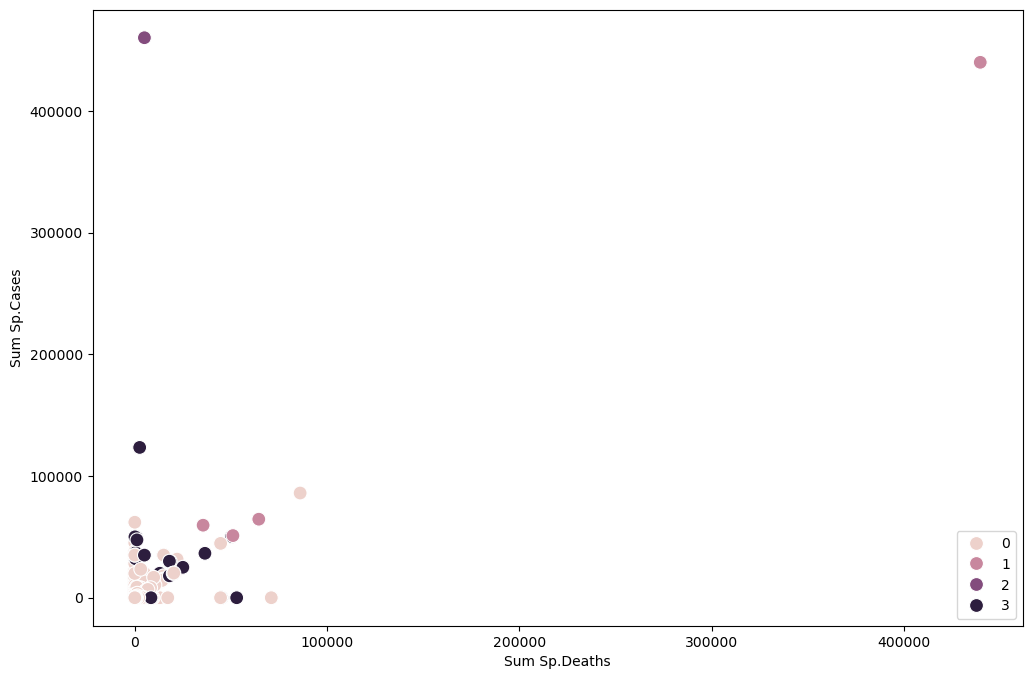

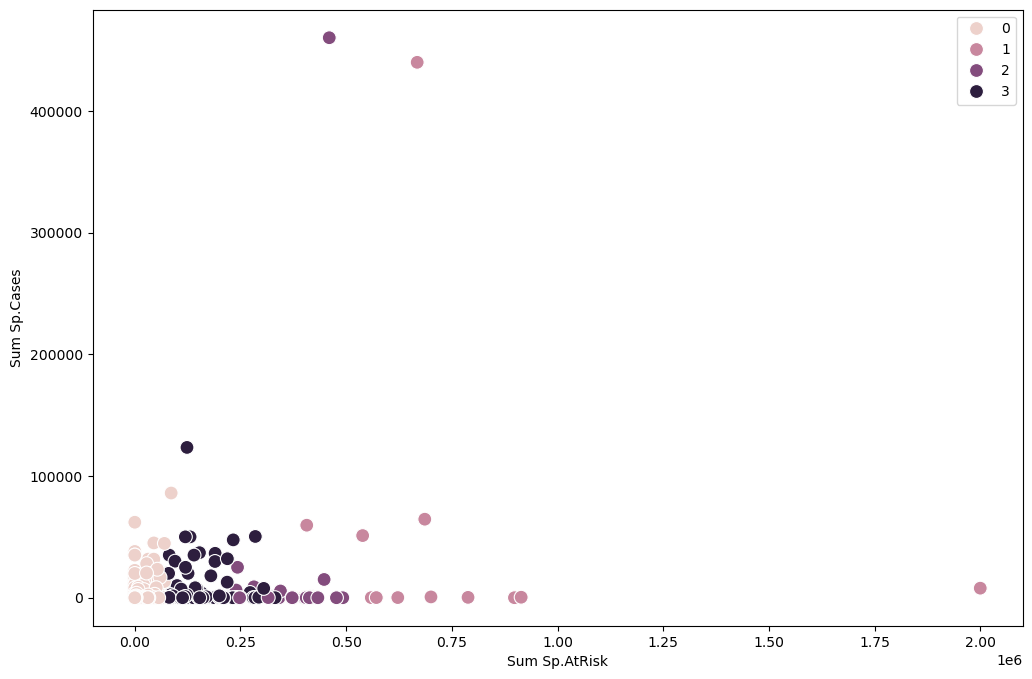

In [100]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=GADS_ndvars['Sum Sp.AtRisk'], y=GADS_ndvars['Sum Sp.Cases'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Sum Sp.AtRisk') 
plt.ylabel('Sum Sp.Cases') 
plt.show()

In [101]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=GADS_ndvars['Sum Sp.AtRisk'], y=GADS_ndvars['Sum Sp.Cases'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Sum Sp.AtRisk') 
plt.ylabel('Sum Sp.Cases')
plt.savefig("cluster at risk vs cases -4.png")

##### There is a large difference between the values represented in the cluster. Lets try using seven as our cluster.

In [103]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 6)

In [104]:
# Fit the k-means object to the data.

kmeans.fit(GADS_ndvars)

KMeans(n_clusters=6)

In [105]:
GADS_ndvars['cluster'] = kmeans.fit_predict(GADS_ndvars)

C:\Users\jmesi\AppData\Local\Temp\ipykernel_22776\1963077768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GADS_ndvars['cluster'] = kmeans.fit_predict(GADS_ndvars)


In [106]:
GADS_ndvars.head()

,Latitude,Longitude,Sum Sp.AtRisk,Sum Sp.Cases,Sum Sp.Deaths,...,Humans Age,Humans Affected,Humans Deaths,clusters,cluster
0,-27.900000,30.800000,248000.0,12.0,12.0,...,0.0,0.0,0.0,3,4
1,54.837037,73.354155,122.0,6.0,1.0,...,0.0,0.0,0.0,0,0
2,-21.077740,30.211620,1283.0,112.0,0.0,...,0.0,0.0,0.0,0,0
3,-26.000000,28.300000,0.0,1.0,1.0,...,0.0,0.0,0.0,0,0
4,49.237900,17.700200,0.0,1.0,1.0,...,0.0,0.0,0.0,0,0


In [107]:
GADS_ndvars['cluster'].value_counts()

cluster
0    15047
2      216
1       46
4       25
3       10
5        1
Name: count, dtype: int64

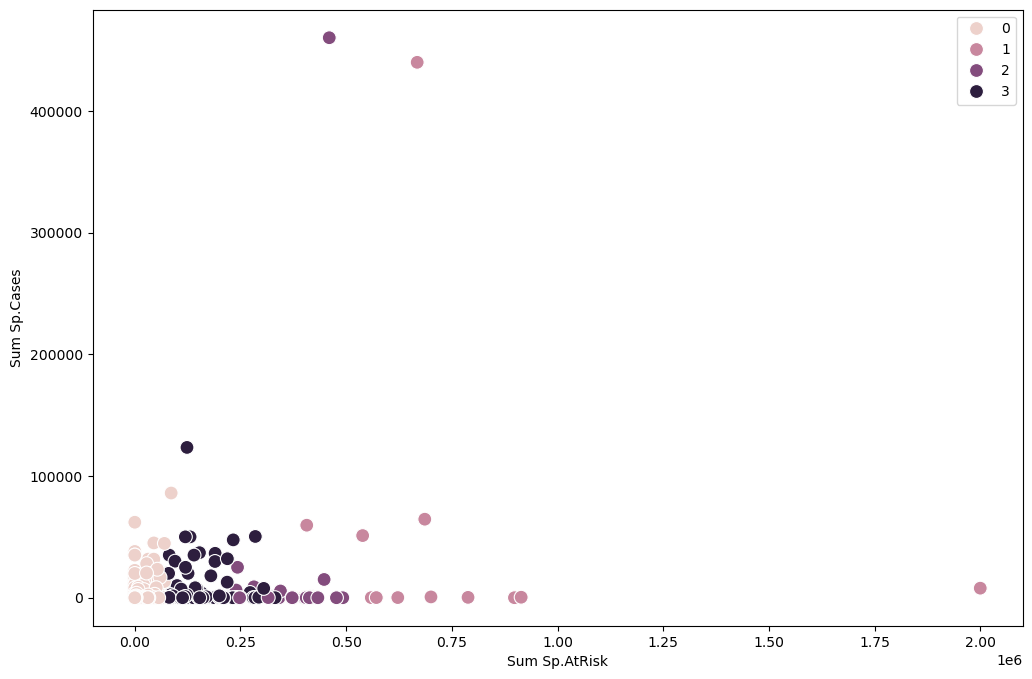

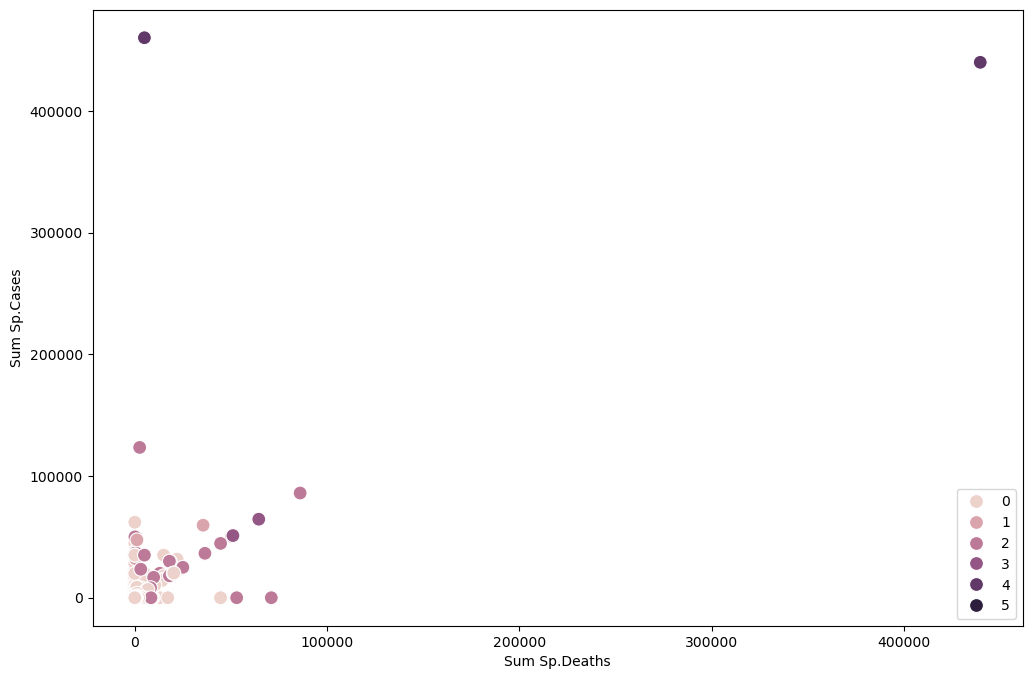

In [108]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=GADS_ndvars['Sum Sp.Deaths'], y=GADS_ndvars['Sum Sp.Cases'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sum Sp.Deaths') # Label x-axis.
plt.ylabel('Sum Sp.Cases') # Label y-axis.
plt.show()

In [109]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=GADS_ndvars['Sum Sp.Deaths'], y=GADS_ndvars['Sum Sp.Cases'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sum Sp.Deaths') # Label x-axis.
plt.ylabel('Sum Sp.Cases') # Label y-axis.
plt.savefig("cluster deaths vs cases -6 .png")

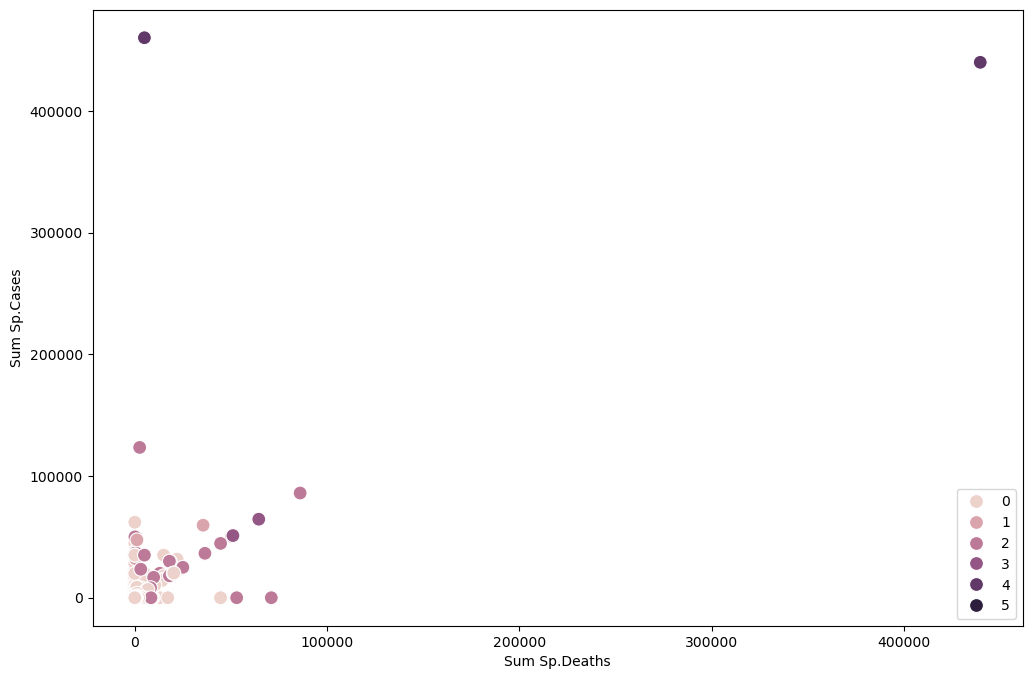

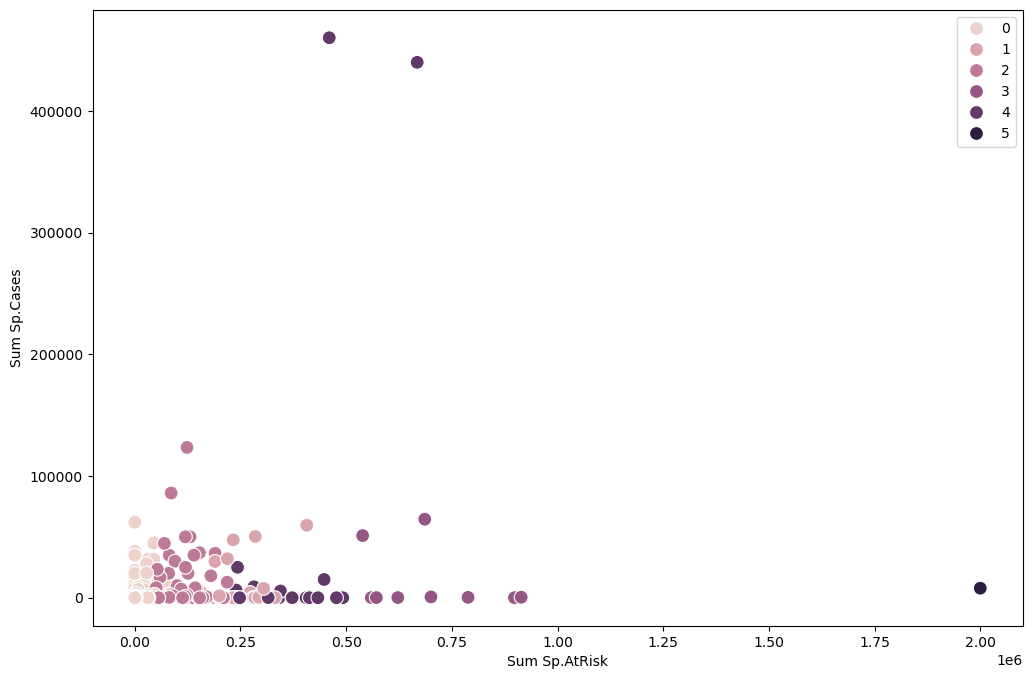

In [110]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=GADS_ndvars['Sum Sp.AtRisk'], y=GADS_ndvars['Sum Sp.Cases'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Sum Sp.AtRisk') 
plt.ylabel('Sum Sp.Cases') 
plt.show()

In [111]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=GADS_ndvars['Sum Sp.AtRisk'], y=GADS_ndvars['Sum Sp.Cases'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Sum Sp.AtRisk') 
plt.ylabel('Sum Sp.Cases')
plt.savefig("cluster at risk vs cases -6.png")

In [164]:
GADS_ndvars.loc[GADS_ndvars['cluster'] == 5, 'cluster'] = 'green'
GADS_ndvars.loc[GADS_ndvars['cluster'] == 4, 'cluster'] = 'red'
GADS_ndvars.loc[GADS_ndvars['cluster'] == 3, 'cluster'] = 'orange'
GADS_ndvars.loc[GADS_ndvars['cluster'] == 2, 'cluster'] = 'dark purple'
GADS_ndvars.loc[GADS_ndvars['cluster'] == 1, 'cluster'] = 'purple'
GADS_ndvars.loc[GADS_ndvars['cluster'] == 0, 'cluster'] = 'pink'

In [166]:
GADS_ndvars.groupby('cluster').agg({'Sum Sp.Deaths':['mean', 'median'], 
                         'Sum Sp.Cases':['mean', 'median'], 
                         'Sum Sp.AtRisk':['mean', 'median'],
                          'Sum Sp.Destroyed':['mean', 'median']})

Sum Sp.Deaths          Sum Sp.Cases         Sum Sp.AtRisk  \
                     mean  median          mean  median          mean   
cluster                                                                 
dark purple   3417.273148   130.0   4340.462963   100.0  9.689404e+04   
green         7845.000000  7845.0   7845.000000  7845.0  2.000000e+06   
orange       11727.900000   212.5  11727.900000   212.5  7.177028e+05   
pink            87.816907     0.0    164.668107     1.0  1.321099e+03   
purple        2767.804348   128.0   5231.195652   128.0  2.726211e+05   
red          19852.120000     0.0  38447.680000    15.0  3.728660e+05   

                       Sum Sp.Destroyed            
                median             mean    median  
cluster                                            
dark purple    87892.0     67822.398148   62040.5  
green        2000000.0     75155.000000   75155.0  
orange        693312.5    705974.900000  661009.5  
pink               5.0       884.425733       0.0  
purple        237965.5    269853.304348  235550.0  
red           372331.0     11128.040000       0.0

##### Looking at the clusters with the value of 7 and first looking at Sum Sp.Cases vs Sum Sp.AtRisk you can compared that there are <100,000 cases reported containing <400 species. With such large numbers documented for animal disease surveillance you can interpret that there are rares cases documented with a range of >100,000 - <500,000 containing <400 species. In one rare case there was a report containing at least 800 speces with low case reportings.

##### Looking at the cluster with the value of 7 and looking at the Sum Sp.Cases vs Sum Sp.Deaths, it appears that are some cases that are reported that also have the equal amount of deaths. However, there are a larger portion of cases reported with smaller numbers of deaths associated with them. The more exaggerated points show that there is once case of 400,000 reportings and <50,000 resulted in deaths. However on a different report there were >400,000 reportings that results in an equal amount of deaths. 

#### Removing Outliers and using n-cluster 3 - Gemini AI Guided

In [212]:
# Creating threshold
death_threshold = 150000  # Adjust this value as needed

In [214]:
# Filter out data points where 'Sum Sp.Deaths' is above the threshold
GADS_ndvars_filtered = GADS_ndvars[GADS_ndvars['Sum Sp.Deaths'] < death_threshold].copy()

In [216]:
# Perform k-means clustering on the filtered data
kmeans_filtered = KMeans(n_clusters=4, n_init=10, random_state=42)
GADS_ndvars_filtered['clusters_filtered'] = kmeans_filtered.fit_predict(GADS_ndvars_filtered[['Sum Sp.Deaths', 'Sum Sp.Cases']])

In [280]:
GADS_ndvars['clusters'].value_counts()

clusters
0    15299
3       44
2        1
1        1
Name: count, dtype: int64

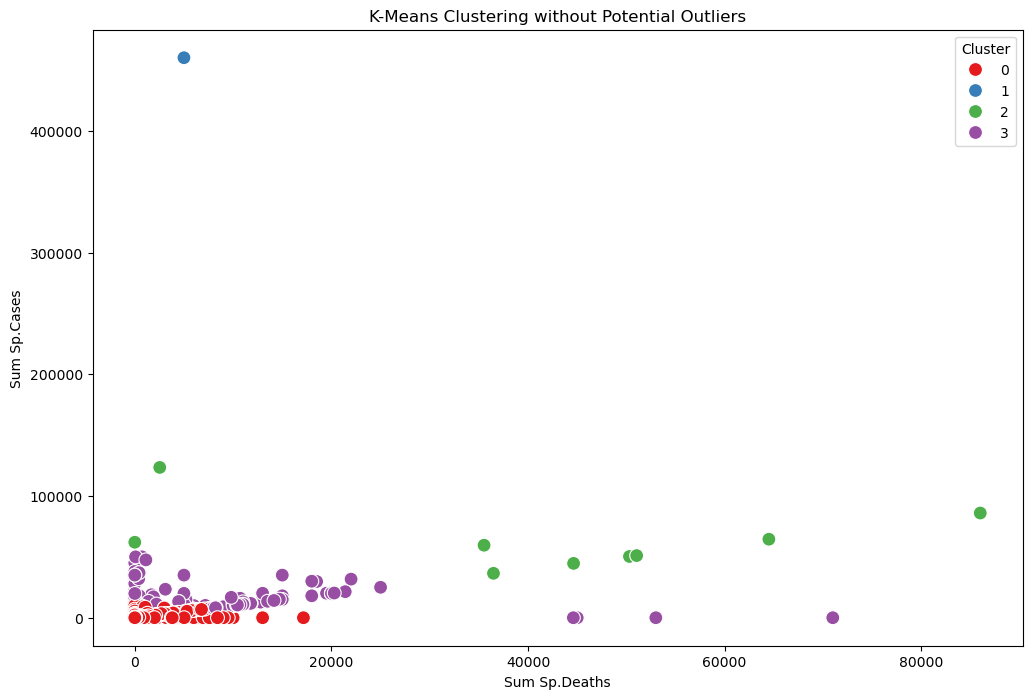

In [278]:
# Plot the new clusters without the potential outliers
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sum Sp.Deaths', y='Sum Sp.Cases', hue='clusters_filtered', data=GADS_ndvars_filtered, palette='Set1', s=100)
plt.title('K-Means Clustering without Potential Outliers')
plt.xlabel('Sum Sp.Deaths')
plt.ylabel('Sum Sp.Cases')
plt.grid(False)
plt.legend(title='Cluster')
plt.show()

In [274]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sum Sp.Deaths', y='Sum Sp.Cases', hue='clusters_filtered', data=GADS_ndvars_filtered, palette='Set1', s=100)
plt.title('K-Means Clustering without Potential Outliers')
plt.xlabel('Sum Sp.Deaths')
plt.ylabel('Sum Sp.Cases')
plt.grid(False)
plt.legend(title='Cluster')
plt.savefig("K-Means Clustering without Potential Outliers.png")

##### Observing this new kmeans cluster withouth the added outliers paints a better picture of the sum of species cases vs the sum of species deaths. We can see that the the 0 cluster (red) shows cases reported under 50,000 and of those cases there are under 200,000 deaths. Cluster 1 (blue) can be a representative of an outlier that wasn't excluded as it has 8,000 cases reported and deaths that far exceed 400,000. Cluster 2 (green) has a varied distribution and very few. It has case reporting ranging from 70,000-130,000 with deaths ranging from 1,000-80,000+. Finally, Cluster 3 (purple) has a large variation in cases reported and deaths recorded. There are cases ranging from 0-70,000 the deaths are all under 80,000. This cluster gives you a better understanding of how cases reported may not be equal to the death tolls that follow.

##### Exporting (pickle)

In [296]:
GADS_ndvars.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'GADS_ndvars_6.5.pkl'))